In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import sys

sys.path.append('/Users/patrick_bloniasz/Documents/GitHub/filtered_point_process')

from filtered_point_process.PointProcess import PointProcessModel
from filtered_point_process.FPP import FilteredPointProcess

## Panel 3A in Bloniasz, Oyama, Stephen (2024)

In [2]:
#### CIF Functions

# Parameters for the GABA simulation

# Define Simulation Method
method = 'AR(1)'


params = {
    'method': 'AR(1)',
    'phi_1': 0.98,
    'white_noise_variance': 0.75,
    'fs': 1/0.0001,
    'T': 5,
    'Nsims': 1,
    'lambda_0': [200]
}

model_1 = PointProcessModel(params = params, seed=45)
model_1.simulate_pp()  # Simulate the CIF model for model_1

# Define the filters to be used
filters = {
    'GABA': 'GABA',
    '1/f': '1/f'
}

# Instantiate the FilteredPointProcess class with the specified filters and model
fpp = FilteredPointProcess(filters=filters, model=model_1)


/Users/patrick_bloniasz/Documents/GitHub/filtered_point_process/filtered_point_process/PointProcess.py:9: UserWarning: Seed set globally to 45 for reproducibility.
  super()._set_seed(seed)
/Users/patrick_bloniasz/Documents/GitHub/filtered_point_process/filtered_point_process/cif.py:20: UserWarning: Seed set globally to 45 for reproducibility.
  super()._set_seed(seed)
/Users/patrick_bloniasz/Documents/GitHub/filtered_point_process/filtered_point_process/pp.py:25: UserWarning: Seed set globally to 45 for reproducibility.
  super()._set_seed(seed)


In [3]:
# Panel 1 info

frequencies = fpp.pp.params['frequencies']

total_pp_PSD = fpp.model.pp_PSD

cif_PSD = fpp.model.cif_PSD

pp_rate = fpp.model.pp_PSD - fpp.model.cif_PSD

# Panel 2 info

# Retrieve spectra
spectra = fpp.get_spectra()
filters = fpp.get_filters()


total_1 = spectra['pp * GABA']
filtered_rate_1 = (pp_rate ) * filters['GABA']['power_spectrum']
filtered_cif_1 = (cif_PSD) * filters['GABA']['power_spectrum']


total_2 = spectra['pp * GABA * 1/f']
filtered_rate_2 = (pp_rate ) * filters['GABA']['power_spectrum'] * filters['1/f']['power_spectrum']
filtered_cif_2 = (cif_PSD ) * filters['GABA']['power_spectrum'] * filters['1/f']['power_spectrum']


def find_intersection(x, y1, y2):
    idx = np.argwhere(np.diff(np.sign(y1 - y2))).flatten()
    return x[idx], y1[idx]


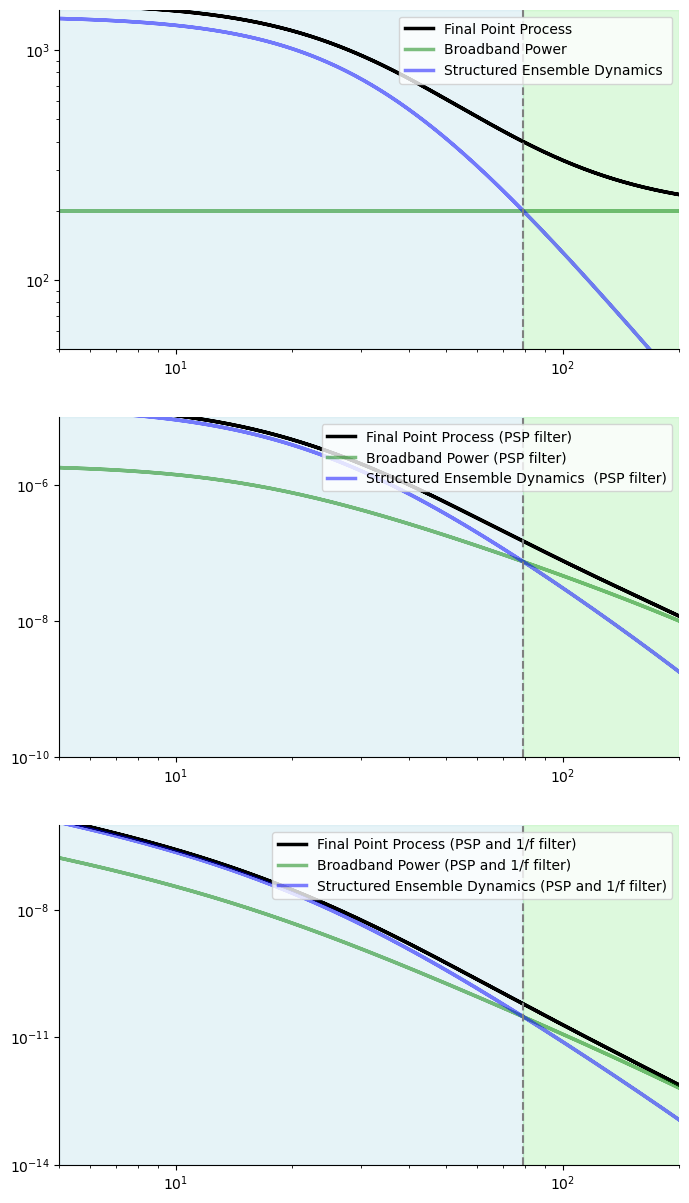

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(8, 15))

# Increase the global font size for all text in the plots
plt.rcParams['font.size'] = 30  # You can adjust the size as needed
plt.rcParams['axes.titlesize'] = 30  # For subplot titles
plt.rcParams['axes.labelsize'] = 30  # For x and y labels
plt.rcParams['xtick.labelsize'] = 30  # For x-axis tick labels
plt.rcParams['ytick.labelsize'] = 30 # For y-axis tick labels
plt.rcParams['legend.fontsize'] = 10  # For legend text

# Panel 1
axs[0].loglog(frequencies, total_pp_PSD, label='Final Point Process', color = 'black', linewidth=2.5)
axs[0].loglog(frequencies, pp_rate, label='Broadband Power', color = 'green', alpha=0.5, linewidth=2.5)
axs[0].loglog(frequencies, cif_PSD , label='Structured Ensemble Dynamics ', color = 'blue', alpha=0.5, linewidth=2.5)
axs[0].set_xlim([5, 200])
axs[0].set_ylim([50, 1500])
axs[0].legend(loc = 'upper right')

# Intersection for Panel 1
x_inter, _ = find_intersection(frequencies, cif_PSD, pp_rate)
if x_inter.size > 0:
    axs[0].axvline(x=x_inter[0], color='gray', linestyle='--')  # Plot only the first intersection
    axs[0].axvspan(5, x_inter[0], color='lightblue', alpha=0.3)
    axs[0].axvspan(x_inter[0], 200, color='lightgreen', alpha=0.3)

# Panel 2
axs[1].loglog(frequencies, total_1, label='Final Point Process (PSP filter)', color = 'black', linewidth=2.5)
axs[1].loglog(frequencies, (filtered_rate_1 / params['fs']**2), label='Broadband Power (PSP filter)', color = 'green', alpha = 0.5, linewidth=2.5)
axs[1].loglog(frequencies, (filtered_cif_1/params['fs']**2), label='Structured Ensemble Dynamics  (PSP filter)', color = 'blue', alpha = 0.5, linewidth=2.5)


axs[1].set_xlim([5, 200])
axs[1].set_ylim([1e-10, 1e-5])
axs[1].legend(loc = 'upper right')

# Intersection for Panel 2
x_inter, _ = find_intersection(frequencies, filtered_rate_1, filtered_cif_1)
if x_inter.size > 0:
    axs[1].axvline(x=x_inter[0], color='gray', linestyle='--')
    axs[1].axvspan(5, x_inter[0], color='lightblue', alpha=0.3)
    axs[1].axvspan(x_inter[0], 200, color='lightgreen', alpha=0.3)

# Panel 3
axs[2].loglog(frequencies, total_2, label='Final Point Process (PSP and 1/f filter)', color = 'black', linewidth=2.5)
axs[2].loglog(frequencies, (filtered_rate_2/params['fs']**2), label='Broadband Power (PSP and 1/f filter)', color = 'green', alpha = 0.5, linewidth=2.5)
axs[2].loglog(frequencies, (filtered_cif_2/params['fs']**2), label='Structured Ensemble Dynamics (PSP and 1/f filter)', color = 'blue', alpha = 0.5, linewidth=2.5)
axs[2].set_xlim([5, 200])
axs[2].set_ylim([1e-14, 1e-6])
axs[2].legend(loc = 'upper right')

# Intersection for Panel 3
x_inter, _ = find_intersection(frequencies, filtered_rate_2, filtered_cif_2)
if x_inter.size > 0:
    axs[2].axvline(x=x_inter[0], color='gray', linestyle='--')
    axs[2].axvspan(5, x_inter[0], color='lightblue', alpha=0.3)
    axs[2].axvspan(x_inter[0], 200, color='lightgreen', alpha=0.3)

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

#plt.tight_layout()
plt.savefig("/Users/patrick_bloniasz/Documents/GitHub/filtered_point_process/filtered_point_process/Notebooks/Figures_Bloniasz_et_al_2024/figure_3A.svg", format='svg', dpi=500)
plt.savefig("/Users/patrick_bloniasz/Documents/GitHub/filtered_point_process/filtered_point_process/Notebooks/Figures_Bloniasz_et_al_2024/figure_3A.png", format='png', dpi=500)

plt.show()
